# PROYECTO MACHINE LEARNING
## CSI QT 2019/20

Para la realización de este proyecto, se escoge el modelo de **Yacht Hydrodynamics (regresión)** y se genera un modelo predictivo que minimiza el error de generalización.

Se ha prodedido a la obtención de los datos a partir del siguiente enlace:
http://archive.ics.uci.edu/ml/datasets/yacht+hydrodynamics

Según el **Dr Roberto Lopez** la contextualización del *dataset* es el siguiente:

*La predicción de la resistencia residual de los yates de vela en la etapa de diseño inicial es de gran valor para evaluar el rendimiento del barco y para estimar la potencia propulsora requerida. Las entradas esenciales incluyen las dimensiones básicas del casco y la velocidad del barco.*

*El conjunto de datos de Delft comprende 308 experimentos a gran escala, que se realizaron en el Laboratorio de Hidromecánica de Barcos de Delft para ese propósito.*

*Estos experimentos incluyen 22 formas diferentes de casco, derivadas de una forma parental estrechamente relacionada con el "Standfast 43" diseñado por Frans Maas.*

Según el enuncidado, el modelo tiene que predecir la variable en la última columna a partir de las 6 variables numéricas anteriores.


Las variables se refieren a los coeficientes de geometría del casco y al número de Froude:

1. Posición longitudinal del centro de flotabilidad, adimensional.
2. Coeficiente prismático, adimensional.
3. Relación longitud-desplazamiento, adimensional.
4. Relación viga-tiro, adimensional.
5. Relación longitud-viga, adimensional.
6. Número de Froude, adimensional.

La variable que se quiere predecir es la resistencia residual por unidad de peso de desplazamiento:

7. Resistencia residual por unidad de peso de desplazamiento, adimensional.

## Importación del *dataset*

In [0]:
import pandas as pd
yacht_dataset = pd.read_csv('yacht_hydrodynamics.data', sep=" ")

Se puede observar la estructura que tiene el *dataset*: los parámetros son los descritos anteriormente, donde la última variable (*Res_residual*) es la que se desea realizar el modelo para que se aproxime más a los valores reales del *dataset*.

In [0]:
yacht_dataset

,Pos_long_centro_flotab,Coef_prism,Long_Despl,Viga_tiro,Long_viga,Num_Froude,Res_residual
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


## Inspección del *dataset*

Mostramos los gráficos por pantalla para tener una referencia visual sobre cómo son de dispares los datos en el set que tenemos

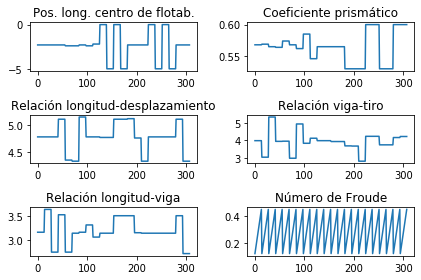

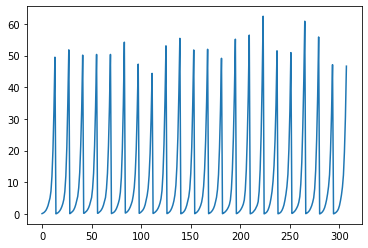

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

centro_flotab = yacht_dataset.Pos_long_centro_flotab
coef_prism = yacht_dataset.Coef_prism
long_despl = yacht_dataset.Long_Despl
viga_tiro = yacht_dataset.Viga_tiro
long_viga = yacht_dataset.Long_viga
num_froude = yacht_dataset.Num_Froude
res_residual = yacht_dataset.Res_residual

# Dataset subplots of each feature
centro_flotab_plot = plt.subplot(3, 2, 1) 
centro_flotab_plot.title.set_text('Pos. long. centro de flotab.')
plt.plot(centro_flotab)

coef_prism_plot = plt.subplot(3, 2, 2) 
coef_prism_plot.title.set_text('Coeficiente prismático')
plt.plot(coef_prism)

long_despl_plot = plt.subplot(3, 2, 3)
long_despl_plot.title.set_text('Relación longitud-desplazamiento')
plt.plot(long_despl)

viga_tiro_plot = plt.subplot(3, 2, 4)
viga_tiro_plot.title.set_text('Relación viga-tiro')
plt.plot(viga_tiro)

long_viga_plot = plt.subplot(3, 2, 5)
long_viga_plot.title.set_text('Relación longitud-viga')
plt.plot(long_viga)

num_froude_plot = plt.subplot(3, 2, 6)
num_froude_plot.title.set_text('Número de Froude')
plt.plot(num_froude)

plt.tight_layout()
plt.show()

# Se muestra la variable la cual que se quiere aproximar el modelo
res_residual_plot = plt.plot(res_residual)

Mostramos un gráfico que aglutina todas las variables de entrada del dataset.

Text(0, 0.5, 'Variables de Entrada')

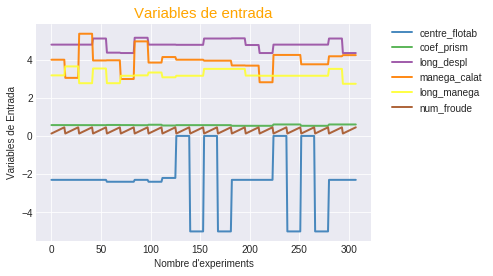

In [0]:
# Make a dataframe with input data
df_yacht = pd.DataFrame({'num_data': range(0,308), 
                         'centre_flotab': centro_flotab,
                         'coef_prism': coef_prism,
                         'long_despl': long_despl,
                         'manega_calat': viga_tiro,
                         'long_manega': long_viga,
                         'num_froude': num_froude})

# Style of the plot
plt.style.use('seaborn-darkgrid')

# Create palette color
palette = plt.get_cmap('Set1')

# Plot multiple plots in one
num=0
for column in df_yacht.drop('num_data', axis=1):
  num+=1
  plt.plot(df_yacht['num_data'], df_yacht[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
 
# Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 
# Titles
plt.title("Variables de entrada", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Nombre d'experiments")
plt.ylabel("Variables de Entrada")




Vemos cómo están los datos distribuídos estadísticamente

In [0]:
yacht_dataset.describe()

,Pos_long_centro_flotab,Coef_prism,Long_Despl,Viga_tiro,Long_viga,Num_Froude,Res_residual
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


## Preprocesamiento de los datos

Preprocesamos los datos normalizándolos

In [0]:
import numpy as np

# MinMaxScaler it is not used since it rescales the data worse than MaxAbsScaler
# from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler

# Selected the scaler to rescale data
scaler = MaxAbsScaler()

# Make a copy of the data in order not to change original one
yacht_dataset_scaled = yacht_dataset.copy()
# Rescale the data using the scaler selected above
yacht_data_scaled = scaler.fit_transform(yacht_dataset)
yacht_dataset_scaled.loc[:,:] = yacht_data_scaled
scaler_params = scaler.get_params()

# Getting the function that relates original and resized data of each feature (used later for rescaling)
# Create array containing all the data
extract_scaling_function = np.ones((1,yacht_dataset_scaled.shape[1]))
print(extract_scaling_function)
# Fill the array with resized ratio of each feature
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)
print(extract_scaling_function)
display(yacht_dataset_scaled)

[[1. 1. 1. 1. 1. 1. 1.]]
[[ 5.    0.6   5.14  5.35  3.64  0.45 62.42]]


,Pos_long_centro_flotab,Coef_prism,Long_Despl,Viga_tiro,Long_viga,Num_Froude,Res_residual
0,-0.46,0.946667,0.929961,0.745794,0.870879,0.277778,0.001762
1,-0.46,0.946667,0.929961,0.745794,0.870879,0.333333,0.004326
2,-0.46,0.946667,0.929961,0.745794,0.870879,0.388889,0.007530
3,-0.46,0.946667,0.929961,0.745794,0.870879,0.444444,0.012496
4,-0.46,0.946667,0.929961,0.745794,0.870879,0.500000,0.018904
...,...,...,...,...,...,...,...
303,-0.46,1.000000,0.844358,0.790654,0.750000,0.777778,0.135694
304,-0.46,1.000000,0.844358,0.790654,0.750000,0.833333,0.196572
305,-0.46,1.000000,0.844358,0.790654,0.750000,0.888889,0.313842
306,-0.46,1.000000,0.844358,0.790654,0.750000,0.944444,0.488305


Text(0, 0.5, 'Variables de Entrada Reescalades')

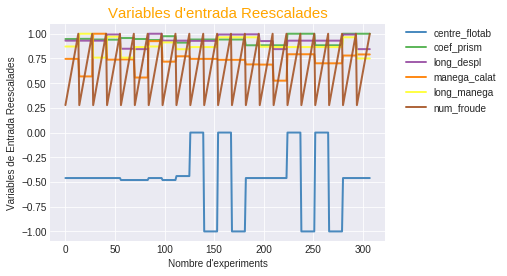

In [0]:
# Make dataframe with input data
df_yacht_scaled = pd.DataFrame({'num_data': range(0,308), 
                                'centre_flotab': yacht_data_scaled[:,0],
                                'coef_prism': yacht_data_scaled[:,1],
                                'long_despl': yacht_data_scaled[:,2],
                                'manega_calat': yacht_data_scaled[:,3],
                                'long_manega': yacht_data_scaled[:,4],
                                'num_froude': yacht_data_scaled[:,5]})

# Style
plt.style.use('seaborn-darkgrid')

# Make palette color
palette = plt.get_cmap('Set1')

# Display multiple plots in one
num=0
for column in df_yacht_scaled.drop('num_data', axis=1):
  num+=1
  plt.plot(df_yacht_scaled['num_data'], df_yacht_scaled[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
 
# Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 
# Titles
plt.title("Variables d'entrada Reescalades", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Nombre d'experiments")
plt.ylabel("Variables de Entrada Reescalades")

## Separación train/test de los datos

In [0]:
from sklearn.model_selection import  train_test_split

# Store in a vector output data of the dataset
y = yacht_dataset_scaled['Res_residual'].values.reshape(-1,1)
# Create a new dataset with scaled variables in order not to damage original one
X_df = yacht_dataset_scaled.copy()
# Delete from scaled dataset output values = Store input values
X_df.drop(['Res_residual'], axis=1, inplace=True)
X = X_df.values

# Split data into train and test (20% of data) and suffle it 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

# Create a dictionary with all important values of the dataset
dataset = {'X_train': X_train, 'X_test' : X_test,
           'y_train': y_train, 'y_test' : y_test,
           'scaler' : scaler,
           'scaler_function' : extract_scaling_function}

## Entrenamiento del modelo

Definimos la función del para el training del modelo

In [0]:
from sklearn.model_selection import GridSearchCV
import time

def trainYachtModelGridSearchCV(X_train, x_test,
                                y_train, y_test,
                                estimator, 
                                parameters,
                                cv_size):
  # Start training
  start_time = time.time()
  # Combine all permutation of parameters
  grid_obj = GridSearchCV(estimator = estimator,
                          param_grid = parameters,
                          n_jobs = -1,
                          cv = cv_size,
                          verbose = 1)
  # Train model
  grid_trained = grid_obj.fit(X_train, y_train)
  training_time = time.time() - start_time
  # Get the score of the GridSearchCV()
  score_gridsearchcv = grid_trained.score(X_test, y_test)
  # Get the best parameters that GridSearchCV() found
  best_parameters_gridsearchcv = grid_trained.best_params_
  # Get the best estimator from GridSearchCV()
  best_estimator_gridsearchcv = grid_trained.best_estimator_
  # Predict all new test values using the best estimator obtained
  predictions_test = best_estimator_gridsearchcv.predict(X_test)
  
  return {'Regression type' : estimator.__class__.__name__,
          'Training time' : training_time,
          'Score GRCV' : score_gridsearchcv,
          'Best parameters estimator GRCV' : best_parameters_gridsearchcv,
          'Best estimator GRCV' : best_estimator_gridsearchcv,
          'Output Predictions' : predictions_test}




Ejecutamos el training del modelo

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Choose which estimator we want to train our data
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
decision_tree_regression = DecisionTreeRegressor(random_state = 42)
random_forest_regression = RandomForestRegressor(random_state = 42)
adaboost_regression = AdaBoostRegressor()

regression_type = {"linear_regression" : linear_regression,
                   "ridge_regression" : ridge_regression,
                   "lasso_regression" : lasso_regression,
                   "decision_tree_regression" : decision_tree_regression,
                   "random_forest_regression" : random_forest_regression,
                   "adaboost_regression" : adaboost_regression}

# Their parameters
grid_parameters_linear_regression = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}
grid_parameters_ridge_regression = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_parameters_lasso_regression = {'alpha': [1, 2, 3, 5, 7, 10, 20, -5, -3]}
grid_parameters_decision_tree_regression = {'max_depth' : [None, 3,5,7,9,10,11]}
grid_parameters_random_forest_regression = {
  'bootstrap': [True],
  'max_depth': [5, 10, 20],
  'max_features': [2, 3],
  'min_samples_leaf': [3, 4, 5],
  'min_samples_split': [8, 10, 12],
  'n_estimators': [10, 20, 30]
}
grid_parameters_adaboost_regression = {
  'n_estimators': [50, 100],
  'learning_rate' : [0.01,0.05,0.1,0.3,1],
  'loss' : ['linear', 'square', 'exponential']
}


parameter_type = {"grid_parameters_linear_regression" : grid_parameters_linear_regression,
                   "grid_parameters_ridge_regression" : grid_parameters_ridge_regression,
                   "grid_parameters_lasso_regression" : grid_parameters_lasso_regression,
                   "grid_parameters_decision_tree_regression" : grid_parameters_decision_tree_regression,
                   "grid_parameters_random_forest_regression" : grid_parameters_random_forest_regression,
                   "grid_parameters_adaboost_regression" : grid_parameters_adaboost_regression}


# Size of samples of Cross Validation
kfold_cv_size = 10

# Run model training -> Example to train one model, below they are trained all at once
# trainedModel = trainYachtModelGridSearchCV(dataset['X_train'], dataset['X_test'],
#                                            dataset['y_train'], dataset['y_test'],
#                                            decision_tree_regression,
#                                            grid_parameters_decision_tree_regression,
#                                            kfold_cv_size)

# Output status values of trained model
# print(
#     "Regression type: {}".format(trainedModel['Regression type']),
#     "Training time: {}".format(trainedModel['Training time']),
#     "Score GRCV: {}".format(trainedModel['Score GRCV']),
#     "Best parameters estimator GRCV: {}".format(trainedModel['Best parameters estimator GRCV']),
#     "Best estimator GRCV: {}".format(trainedModel['Best estimator GRCV']),
#     sep = "\n" 
# )

Definimos la obtención de métricas del entrenamiento

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

def getMetricsFromTrainedModel(original_output_data,
                               predicted_output_data,
                               data_scaling_function):
  # Get metrics from scaled [-1, 1] data
  r2 = r2_score(y_true = original_output_data,
                y_pred = predicted_output_data)
  mse = mean_squared_error(y_true = original_output_data,
                           y_pred = predicted_output_data)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true = original_output_data, 
                            y_pred = predicted_output_data)
  medae = median_absolute_error(y_true = original_output_data,
                                y_pred = predicted_output_data)
 
  # Rescale predicted data
  predictions_true_scale =  predicted_output_data * data_scaling_function[:,-1]
  # Rescale output test data
  y_test_true_scale = original_output_data * data_scaling_function[:,-1]
  # Get metrics from true scaled data (original)
  r2_true_scale = r2_score(y_true = y_test_true_scale,
                           y_pred = predictions_true_scale)
  mse_true_scale = mean_squared_error(y_true = y_test_true_scale,
                                      y_pred = predictions_true_scale)
  rmse_true_scale = np.sqrt(mse_true_scale)
  mae_true_scale = mean_absolute_error(y_true = y_test_true_scale,
                                       y_pred = predictions_true_scale)
  medae_true_scale = median_absolute_error(y_true = y_test_true_scale,
                                           y_pred = predictions_true_scale)
  
  return {'R2' : r2,
          'R2 True scale' : r2_true_scale,
          'MSE' : mse,
          'MSE True scale' : mse_true_scale,
          'RMSE' : rmse,
          'RMSE True scale' : rmse_true_scale,
          'MAE' : mae,
          'MAE True scale' : mae_true_scale,
          'MEDAE' : medae,
          'MEDAE True scale' : medae_true_scale,
          "Predictions True scale": predictions_true_scale,
          "Output Test True scale" : y_test_true_scale}

Ejecutamos las métricas del modelo

In [0]:
# Run statiscitcs of the model -> Example to get the metrics, below they are obtained all at once 
# Run statistics of trained model
# metricsTrainedModel = getMetricsFromTrainedModel(dataset['y_test'],
#                                                  trainedModel['Output Predictions'],
#                                                  dataset['scaler_function'])

# # Output their values
# print(
#     "R2: {}".format(metricsTrainedModel['R2']),
#     "R2 True scale: {}".format(metricsTrainedModel['R2 True scale']),
#     "MSE: {}".format(metricsTrainedModel['MSE']),
#     "MSE True scale: {}".format(metricsTrainedModel['MSE True scale']),
#     "RMSE: {}".format(metricsTrainedModel['RMSE']),
#     "RMSE True scale: {}".format(metricsTrainedModel['RMSE True scale']),
#     "MAE: {}".format(metricsTrainedModel['MAE']),
#     "MAE True scale: {}".format(metricsTrainedModel['MAE True scale']),
#     "MEDAE: {}".format(metricsTrainedModel['MEDAE']),
#     "MEDAE True scale: {}".format(metricsTrainedModel['MEDAE True scale']),
#     sep = "\n" 
# )

R2: 0.9952267317639748
R2 True scale: 0.9952267317639748
MSE: 0.0001820326002872338
MSE True scale: 0.7092456838777775
RMSE: 0.013491945756162593
RMSE True scale: 0.8421672540996696
MAE: 0.006777623072689484
MAE True scale: 0.4230592321972778
MEDAE: 0.002791808809393671
MEDAE True scale: 0.17426470588235293


In [0]:
# Define function for running all regression types
def runAllRegressionTypes(regression_types, parameters_types):
  # Create dataframe for the final table
  df_metrics_regression_table = pd.DataFrame(columns = ["Tipus de Regressió",
                                                       "Temps d'entrenament [s]",
                                                       "Puntuació GRCV",
                                                       "Millor param. GRCV",
                                                       "R2",
                                                       "MSE",
                                                       "RMSE",
                                                       "MAE",
                                                       "MEDAE",
                                                       "R2 Reescalat",
                                                       "MSE Reescalat",
                                                       "RMSE Reescalat",
                                                       "MAE Reescalat",
                                                       "MEDAE Reescalat"])
  # Create dataframe for output predicted values
  df_output_predicted_table = pd.DataFrame(columns = ["Tipus de Regressió",
                                                      "Valor predit",
                                                      "Valor predit reescalat",
                                                      "Valor test reescalat"])

  # Execute all regression types
  i = 0
  for (key1, value1), (key2, value2) in zip(regression_types.items(), parameters_types.items()):
    i += 1
    trainedModelMethod = trainYachtModelGridSearchCV(dataset['X_train'], dataset['X_test'],
                                                        dataset['y_train'], dataset['y_test'],
                                                        value1,
                                                        value2,
                                                        kfold_cv_size)
    metricsTrainedMethod = getMetricsFromTrainedModel(dataset['y_test'],
                                                      trainedModelMethod['Output Predictions'],
                                                      dataset['scaler_function'])
    df_output_predicted_table.loc[i] = [trainedModelMethod['Regression type'],
                                        trainedModelMethod['Output Predictions'],
                                        metricsTrainedMethod['Predictions True scale'],
                                        metricsTrainedMethod['Output Test True scale']] 
    df_metrics_regression_table.loc[i] = [trainedModelMethod['Regression type'],
                                          trainedModelMethod['Training time'],
                                          trainedModelMethod['Score GRCV'],
                                          trainedModelMethod['Best parameters estimator GRCV'],
                                          metricsTrainedMethod['R2'],
                                          metricsTrainedMethod['MSE'],
                                          metricsTrainedMethod['RMSE'],
                                          metricsTrainedMethod['MAE'],
                                          metricsTrainedMethod['MEDAE'],
                                          metricsTrainedMethod['R2 True scale'],
                                          metricsTrainedMethod['MSE True scale'],
                                          metricsTrainedMethod['RMSE True scale'],
                                          metricsTrainedMethod['MAE True scale'],
                                          metricsTrainedMethod['MEDAE True scale']]

  return df_metrics_regression_table, df_output_predicted_table

# Run all regression types
allRegressionTypes = runAllRegressionTypes(regression_type, parameter_type)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   41.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Resultados

Tabla que resume las métricas de todos los algoritmos de entrenamiento utilizados, para **GridSearchCV**

In [0]:
# Show metrics table
allRegressionTypes[0]

,Tipus de Regressió,Temps d'entrenament [s],Puntuació GRCV,Millor param. GRCV,R2,MSE,RMSE,MAE,MEDAE,R2 Reescalat,MSE Reescalat,RMSE Reescalat,MAE Reescalat,MEDAE Reescalat
1,LinearRegression,1.347494,0.545030,"{'copy_X': 'True', 'fit_intercept': 'True', 'n...",0.545030,0.017351,0.131722,0.109060,0.103671,0.545030,67.602635,8.222082,6.807527,6.471161
2,Ridge,0.224335,0.567707,{'alpha': 1.0},0.567707,0.016486,0.128397,0.102860,0.101992,0.567707,64.233094,8.014555,6.420528,6.366315
3,Lasso,0.211985,-0.125256,{'alpha': 1},-0.125256,0.042913,0.207154,0.167953,0.160105,-0.125256,167.198501,12.930526,10.483607,9.993780
4,DecisionTreeRegressor,0.179101,0.995227,{'max_depth': 5},0.995227,0.000182,0.013492,0.006778,0.002792,0.995227,0.709246,0.842167,0.423059,0.174265
5,RandomForestRegressor,41.071060,0.965847,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.965847,0.001302,0.036090,0.022307,0.014216,0.965847,5.074750,2.252720,1.392428,0.887375
6,AdaBoostRegressor,25.043228,0.992009,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.992009,0.000305,0.017457,0.013931,0.013755,0.992009,1.187313,1.089639,0.869555,0.858557


In [0]:
# Show output trained values
allRegressionTypes[1]

,Tipus de Regressió,Valor predit,Valor predit reescalat,Valor test reescalat
1,LinearRegression,"[[0.2363809512305713], [0.29553482985423407], ...","[[14.75489897581226], [18.44728407950129], [-6...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."
2,Ridge,"[[0.2369544132520866], [0.2876270069569507], [...","[[14.790694475195247], [17.953677774252863], [...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."
3,Lasso,"[0.1820535163057494, 0.1820535163057494, 0.182...","[11.363780487804878, 11.363780487804878, 11.36...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."
4,DecisionTreeRegressor,"[0.08986359683251703, 0.12846989601235037, 0.0...","[5.609285714285713, 8.01909090909091, 0.18375,...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."
5,RandomForestRegressor,"[0.07654741088536346, 0.15057955028997966, 0.0...","[4.778089387464387, 9.39917552910053, 1.617577...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."
6,AdaBoostRegressor,"[0.09563574708960804, 0.11411177736073601, 0.0...","[5.9695833333333335, 7.122857142857142, 1.2355...","[[6.31], [7.16], [0.35], [1.37], [21.09], [3.9..."


Gráficas que muestran la salida de los modelos y cómo se ajustan los datos reales

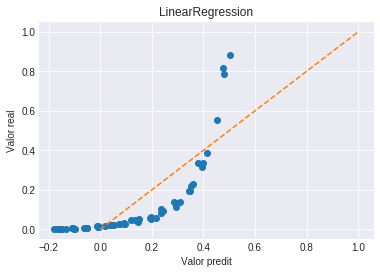

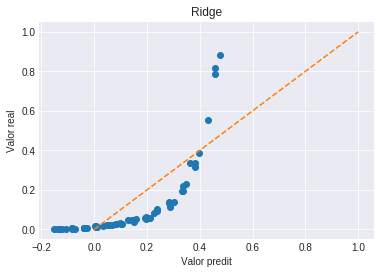

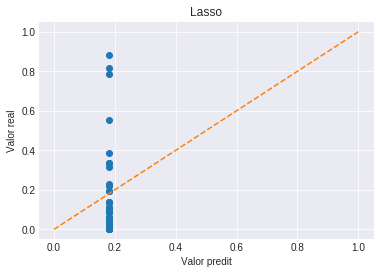

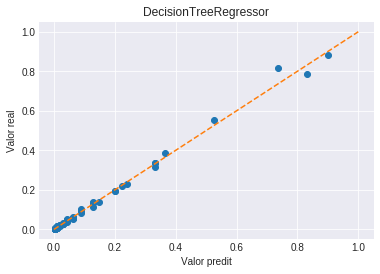

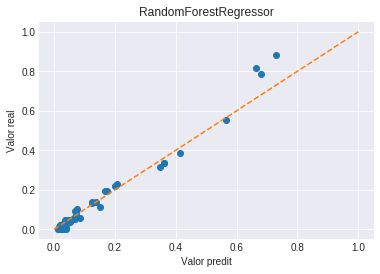

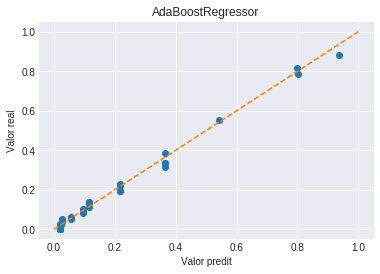

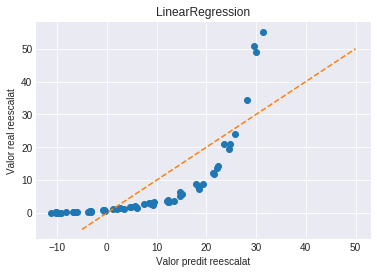

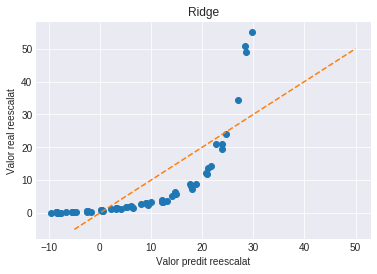

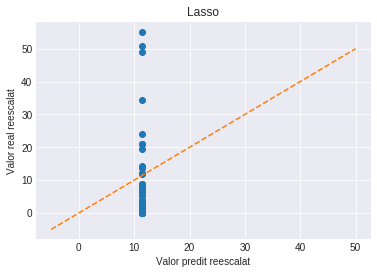

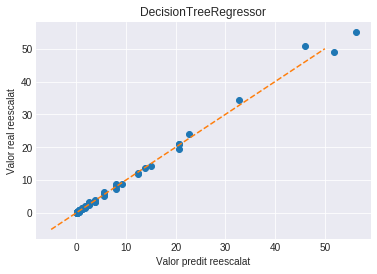

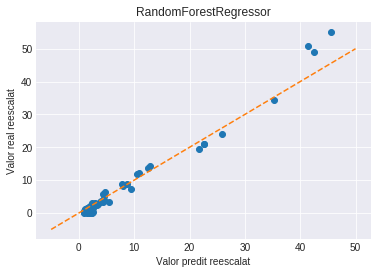

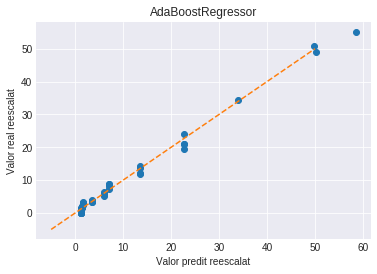

In [0]:
%matplotlib inline

for i in range(1,7):
  x = np.linspace(0, 1, 100)
  plt.plot(allRegressionTypes[1]['Valor predit'][i], dataset['y_test'], linestyle='none', marker='o')
  plt.plot(x, x, '--')
  plt.title(allRegressionTypes[1]['Tipus de Regressió'][i])
  plt.xlabel('Valor predit')
  plt.ylabel('Valor real')
  plt.show() 

for i in range(1,7):
  x = np.linspace(-5, 50, 100)
  plt.plot(allRegressionTypes[1]['Valor predit reescalat'][i], allRegressionTypes[1]['Valor test reescalat'][i], linestyle='none', marker='o')
  plt.plot(x, x, '--')
  plt.title(allRegressionTypes[1]['Tipus de Regressió'][i])
  plt.xlabel('Valor predit reescalat')
  plt.ylabel('Valor real reescalat')
  plt.show()




